In [27]:
# prompt: import all essential libraries for data visualization like matpltolib,
# seaborn, numpy, pandas and some other libraries which are used to train models

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [28]:
from google.colab import files
import pandas as pd

In [51]:
uploaded = files.upload()  # Opens file upload dialog

for filename in uploaded.keys():
    try:
        df = pd.read_csv(filename)  # Load into DataFrame using the uploaded filename
        print(f"File '{filename}' uploaded successfully!")
        # Display first 5 rows
        print(df.head())
    except Exception as e:
        print(f"Error processing file '{filename}': {e}")


Saving bengaluru_house_prices.xls to bengaluru_house_prices (4).xls
File 'bengaluru_house_prices (4).xls' uploaded successfully!
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [52]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [53]:
# prompt: find total missing values in it

print(df.isnull().sum())


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [54]:
# prompt: remove balcony, availability and socity fromt the df

df = df.drop(['balcony', 'availability', 'society'], axis=1)
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [57]:
# prompt:  all the three columns total_sqft, bath, price change their type to integer then  fill null vaues with the average value

import pandas as pd
# Convert 'total_sqft', 'bath', and 'price' to numeric, coercing errors to NaN
for col in ['total_sqft', 'bath', 'price']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values with the mean for each column
for col in ['total_sqft', 'bath', 'price']:
    df[col] = df[col].fillna(df[col].mean())

# Convert columns to integers (this will truncate the decimal part)
for col in ['total_sqft', 'bath', 'price']:
    df[col] = df[col].astype(int)


In [58]:
# prompt: find the type or each column and find the missing values in each column

# Display the data type of each column
print(df.dtypes)

# Find and display the number of missing values in each column
print(df.isnull().sum())


area_type     object
location      object
size          object
total_sqft     int64
bath           int64
price          int64
dtype: object
area_type      0
location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64


In [60]:
# prompt: find the unique values in size column and count their values

size_counts = df['size'].value_counts()
size_counts


,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [63]:
# prompt: make all in the integer remove the BHK, Bedroom RK from size column. and make it only the integer type. and round off value to exact value like 1,2,5,10,20,,,,

import pandas as pd
import re

def clean_size(size_str):
    if pd.isna(size_str):
        return None  # Or handle missing values as needed

    # Use regex to extract numbers
    match = re.search(r"(\d+(?:\.\d+)?)", str(size_str))
    if match:
        size_num = float(match.group(1))
        # Round off to the nearest integer
        return int(round(size_num))
    else:
        return None  # Or handle cases with no numbers as needed


# Apply the cleaning function to the 'size' column
df['size'] = df['size'].apply(clean_size)

# Display the updated 'size' column
df['size'].head()
df['size'].value_counts()


,count
size,
2.0,5528
3.0,4857
4.0,1417
1.0,656
5.0,356
6.0,221
7.0,100
8.0,89
9.0,54


In [77]:
# prompt: make size of df into the strig

df['size'] = df['size'].astype(str)
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [78]:
df.isnull().sum()

,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
price,0
bhk,0


In [80]:
# prompt: fill all null size coulmn  values with the average

# Fill NaN values in 'size' column with the mean of non-null values
df['bhk'] = df['bhk'].fillna(df['bhk'].mean())

# Convert the 'size' column to integers
df['bhk'] = df['bhk'].astype(int)

df.isnull().sum()


,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
price,0
bhk,0


In [81]:
# prompt: remove the null value raw

# Drop rows with any null values
df = df.dropna()

# Display the number of missing values in each column after removing null rows
print(df.isnull().sum())


area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64


In [82]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2,1056,2,39,2
1,Plot Area,Chikka Tirupathi,4,2600,5,120,4
2,Built-up Area,Uttarahalli,3,1440,2,62,3
3,Super built-up Area,Lingadheeranahalli,3,1521,3,95,3
4,Super built-up Area,Kothanur,2,1200,2,51,2


In [83]:
# prompt: remove size from the df

df = df.drop(['size'], axis=1)
df.head()


,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2,39,2
1,Plot Area,Chikka Tirupathi,2600,5,120,4
2,Built-up Area,Uttarahalli,1440,2,62,3
3,Super built-up Area,Lingadheeranahalli,1521,3,95,3
4,Super built-up Area,Kothanur,1200,2,51,2


In [87]:
# prompt: remove the area type

df = df.drop(['area_type'], axis=1)
df.head()


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2,39,2
1,Chikka Tirupathi,2600,5,120,4
2,Uttarahalli,1440,2,62,3
3,Lingadheeranahalli,1521,3,95,3
4,Kothanur,1200,2,51,2


            total_sqft      bath     price       bhk
total_sqft    1.000000  0.382131  0.570300  0.338447
bath          0.382131  1.000000  0.454629  0.895786
price         0.570300  0.454629  1.000000  0.398244
bhk           0.338447  0.895786  0.398244  1.000000


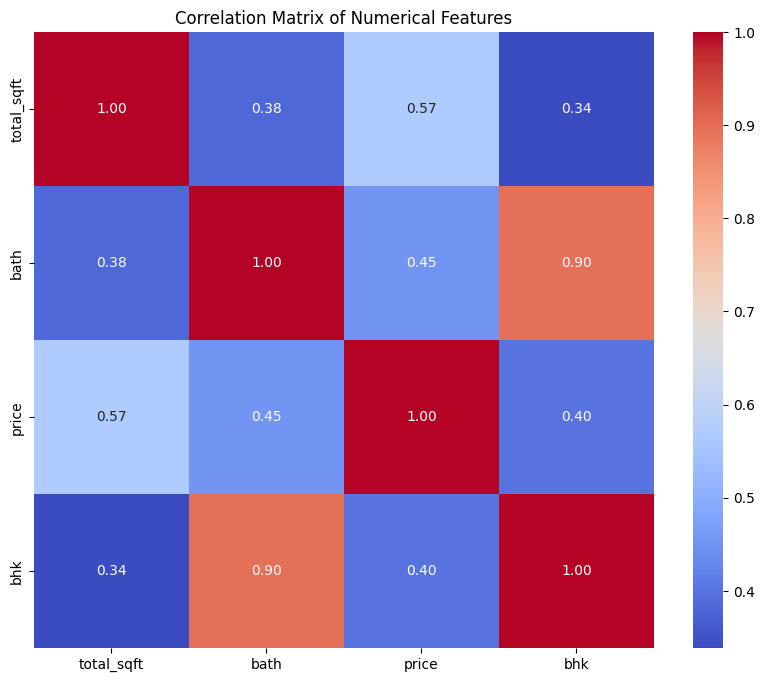

In [90]:
# prompt: make the correlation metrix, on numerical data

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'df' is your DataFrame from the previous code

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


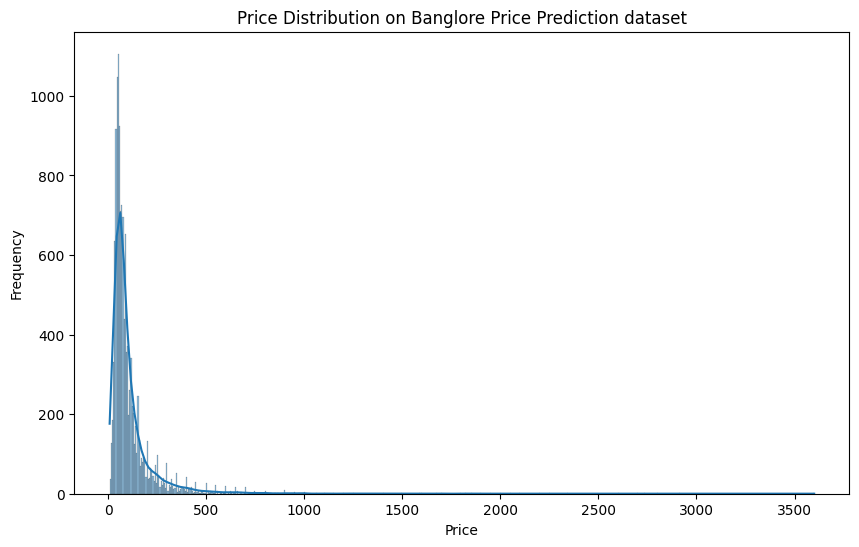

In [91]:
# prompt: make the visualization graph of price distriution

import matplotlib.pyplot as plt
# Assuming 'price' is the column containing price data
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)  # Use histplot for better visualization
plt.title('Price Distribution on Banglore Price Prediction dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [92]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2,39,2
1,Chikka Tirupathi,2600,5,120,4
2,Uttarahalli,1440,2,62,3
3,Lingadheeranahalli,1521,3,95,3
4,Kothanur,1200,2,51,2


In [93]:
df.drop_duplicates(inplace=True)


In [94]:
def convert_sqft(value):
    try:
        return float(value)
    except:
        if '-' in value:
            low, high = value.split('-')
            return (float(low) + float(high)) / 2  # Convert range to average
        return None  # Set invalid values as None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'], inplace=True)  # Drop rows with missing sqft


In [95]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39,2
1,Chikka Tirupathi,2600.0,5,120,4
2,Uttarahalli,1440.0,2,62,3
3,Lingadheeranahalli,1521.0,3,95,3
4,Kothanur,1200.0,2,51,2


In [106]:
df['price_per_sqft'] = df['price']* 100000 / df['total_sqft']


<ipython-input-106-6bcb41c8af06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price']* 100000 / df['total_sqft']


In [107]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39,2,3693.181818
1,Chikka Tirupathi,2600.0,5,120,4,4615.384615
2,Uttarahalli,1440.0,2,62,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95,3,6245.890861
4,Kothanur,1200.0,2,51,2,4250.000000


In [108]:
location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts < 10].index
df['location'] = df['location'].apply(lambda x: 'other' if x in rare_locations else x)


<ipython-input-108-c41e23989492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: 'other' if x in rare_locations else x)


In [109]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39,2,3693.181818
1,Chikka Tirupathi,2600.0,5,120,4,4615.384615
2,Uttarahalli,1440.0,2,62,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95,3,6245.890861
4,Kothanur,1200.0,2,51,2,4250.000000


In [110]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for location, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std_dev = np.std(subdf.price_per_sqft)
        filtered_df = subdf[(subdf.price_per_sqft > (mean - std_dev)) &
                            (subdf.price_per_sqft < (mean + std_dev))]
        df_out = pd.concat([df_out, filtered_df], ignore_index=True)
    return df_out

df = remove_price_per_sqft_outliers(df)


In [111]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft)
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            filtered_df = bhk_df[
                bhk_df.price_per_sqft > (bhk_stats[bhk]['mean'] - bhk_stats[bhk]['std'])
            ]
            exclude_indices = np.append(exclude_indices, filtered_df.index.values)
    return df.drop(exclude_indices, axis='index')

df = remove_bhk_outliers(df)


In [112]:
df = df[df['bath'] < df['bhk'] + 2]


In [113]:
df = pd.get_dummies(df, columns=['location'], drop_first=True)


In [114]:
feature_corr = df.corr()['price'].sort_values(ascending=False)
print(feature_corr)


price                                1.000000
total_sqft                           0.902044
price_per_sqft                       0.478113
location_Dodsworth Layout            0.473987
bath                                 0.465744
                                       ...   
location_Raja Rajeshwari Nagar      -0.037225
location_Ananth Nagar               -0.037871
location_Electronic City Phase II   -0.044088
location_other                      -0.049211
location_Electronic City            -0.056036
Name: price, Length: 242, dtype: float64


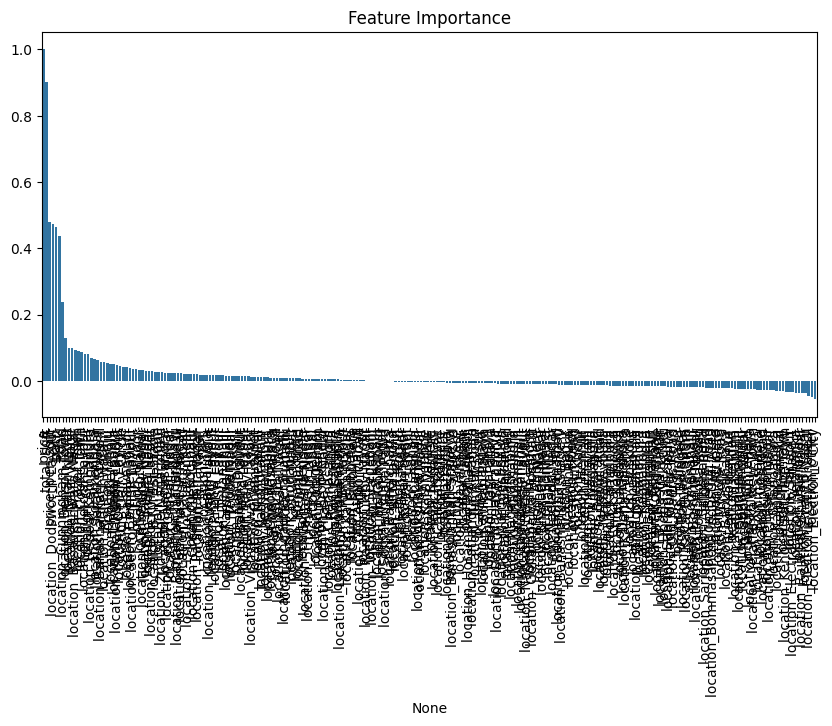

In [115]:
plt.figure(figsize=(10,5))
sns.barplot(x=feature_corr.index, y=feature_corr.values)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()


In [116]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R² Score: {r2_score(y_test, y_pred)}\n")


Linear Regression Performance:
MAE: 11.521386273164401
RMSE: 30.48704662018446
R² Score: 0.8612258484595331

Random Forest Performance:
MAE: 3.404623955431755
RMSE: 24.60395385713239
R² Score: 0.9096168072114765

XGBoost Performance:
MAE: 3.6296780109405518
RMSE: 22.676105254468165
R² Score: 0.9232258796691895



In [119]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 10, 'n_estimators': 50}


In [120]:
best_model = XGBRegressor(n_estimators=50, max_depth=10)
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
# prompt: find the XGBoost accuracy, precision, recall and f1-score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer

# ... (Your existing code) ...

# Assuming 'y_test' and 'y_pred' are from your XGBoost model
y_pred_xgb = best_model.predict(X_test)


#For regression problems, directly calculating accuracy, precision, recall, and F1-score is not meaningful. These metrics are primarily designed for classification tasks.
#Instead of accuracy, use metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) for regression evaluation.  These were already included in your code.
#If you want to evaluate the performance in terms of classification (if your target variable is categorical), then first convert your continuous predictions into categories.

#Example (assuming a price threshold for categorization):
threshold = 100  # Example threshold, adjust as needed
y_pred_class = (y_pred_xgb > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)


print(f"XGBoost Classification Performance (with threshold={threshold}):")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)}")
print(f"Precision: {precision_score(y_test_class, y_pred_class)}")
print(f"Recall: {recall_score(y_test_class, y_pred_class)}")
print(f"F1-score: {f1_score(y_test_class, y_pred_class)}")


XGBoost Classification Performance (with threshold=100):
Accuracy: 0.9916434540389972
Precision: 0.9726027397260274
Recall: 0.9861111111111112
F1-score: 0.9793103448275862


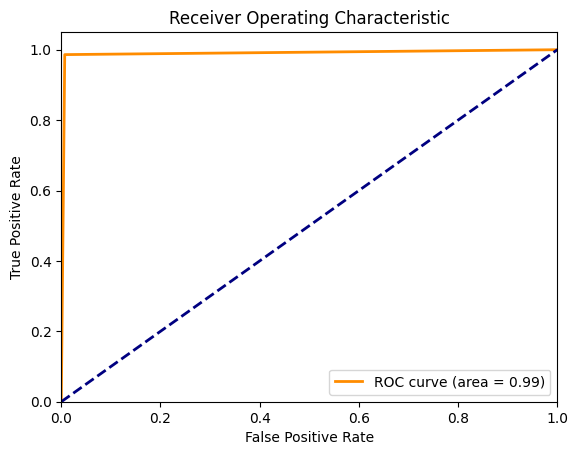

In [123]:
# prompt: make the ROC curve for it

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (Your existing code) ...

# Assuming 'y_test_class' and 'y_pred_class' are from your classification example

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_class)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


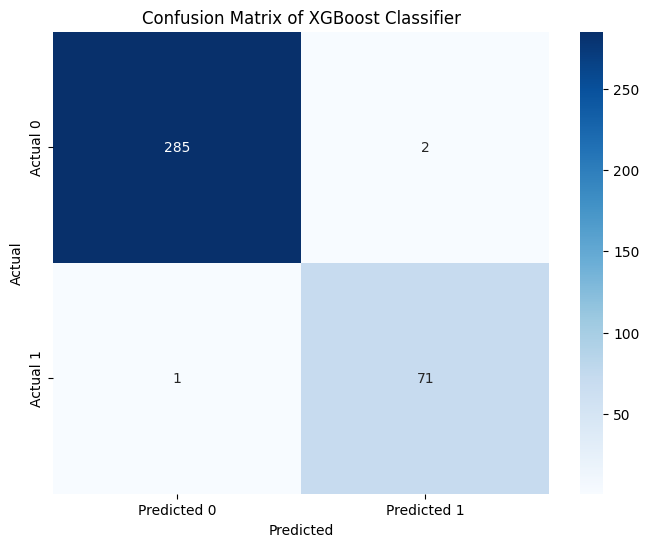

In [125]:
# prompt: make a confusion metrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test_class and y_pred_class are defined from your previous code
cm = confusion_matrix(y_test_class, y_pred_class)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix of XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


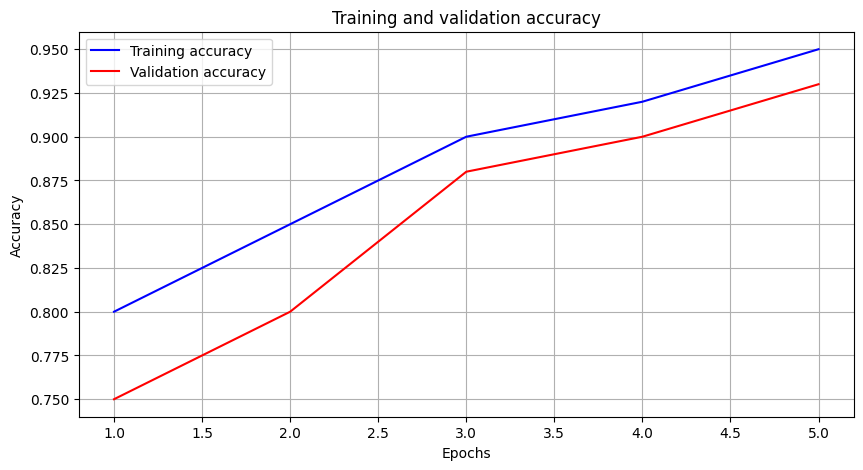

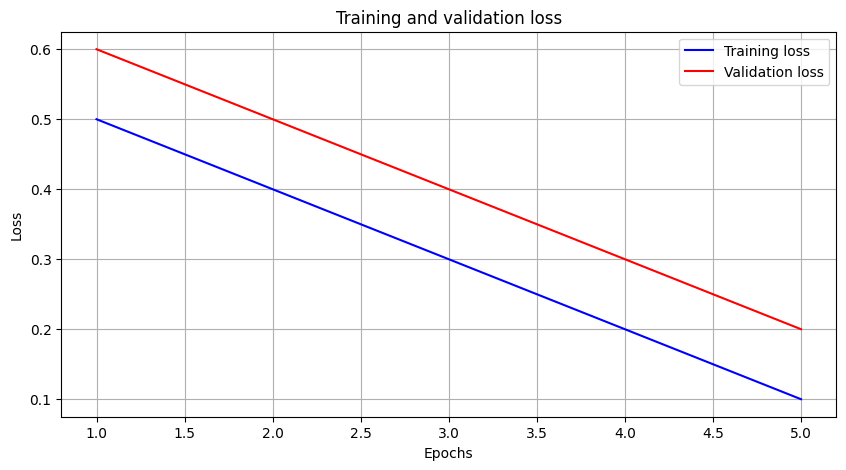

In [126]:
# prompt: make a two graph of training and validation accuracy, training and validation loss

import matplotlib.pyplot as plt

# Assuming you have training and validation history in these lists:
# Replace these with your actual history data
training_accuracy = [0.8, 0.85, 0.9, 0.92, 0.95]  # Example training accuracy values
validation_accuracy = [0.75, 0.8, 0.88, 0.9, 0.93]  # Example validation accuracy values
training_loss = [0.5, 0.4, 0.3, 0.2, 0.1]  # Example training loss values
validation_loss = [0.6, 0.5, 0.4, 0.3, 0.2]  # Example validation loss values

epochs = range(1, len(training_accuracy) + 1)

# Create the first plot (accuracy)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Create the second plot (loss)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
